# Chapter 3. Linear Regression - Exercises

- [3.7 Exercises: Linear regression](#Exercises:-Linear-regression)
    - Exercise 8.
        - (a)
            - [Is there a relationship between the predictor (horsepower) and the response (mpg)?](#Is-there-a-relationship-between-the-predictor-(horsepower)-and-the-response-(mpg)?)
            - [How strong is the relationship between the predictor (horsepower) and the response (mpg)?](#How-strong-is-the-relationship-between-the-predictor-(horsepower)-and-the-response-(mpg)?)
            - [Is the relationship between the predictor (horsepower) and the response (mpg) positive or negative?](#Is-the-relationship-between-the-predictor-(horsepower)-and-the-response-(mpg)-positive-or-negative?)
            - [What is the predicted (mpg) associated with a (horsepower) of 98? What are the associated prediction and confidence intervals?](#What-is-the-predicted-(mpg)-associated-with-a-(horsepower)-of-98?-What-are-the-associated-prediction-and-confidence-intervals?)
        - (b)
            - [Plot of response (mpg) versus predictor (horsepower)](#Plot-of-response-(mpg)-versus-predictor-(horsepower))
            - [Plot of residuals versus predictor (horsepower)](#Plot-of-residuals-versus-predictor-(horsepower))

## Exercises: Linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from patsy import dmatrices

In [2]:
auto_df = pd.read_csv('../data/auto.csv', na_values='?')

In [3]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [5]:
auto_df.describe().applymap('{:.2f}'.format)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.00,397.00,397.00,392.00,397.00,397.00,397.00,397.00
mean,23.52,5.46,193.53,104.47,2970.26,15.56,75.99,1.57
std,7.83,1.70,104.38,38.49,847.90,2.75,3.69,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.00,75.00,2223.00,13.80,73.00,1.00
50%,23.00,4.00,146.00,93.50,2800.00,15.50,76.00,1.00
75%,29.00,8.00,262.00,126.00,3609.00,17.10,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [6]:
auto_df.dropna(inplace=True)
auto_df.horsepower = auto_df.horsepower.astype('int')
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [7]:
auto_df.describe().applymap('{:.2f}'.format)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


### Is there a relationship between the predictor (horsepower) and the response (mpg)?

In [8]:
y, X = dmatrices('mpg ~ horsepower', return_type='dataframe', data=auto_df)

In [9]:
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           7.03e-81
Time:                        10:20:49   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

Due to the large $F$-statistics and very low corresponding $p$-value, we can safely say there is a strong relationship between the predictor and response.

### How strong is the relationship between the predictor (horsepower) and the response (mpg)?

The linear model accounts for about 60% of the variance in the data.

In [10]:
avg = np.mean(auto_df.mpg.values)
print(f'The average response for MPG is {round(avg, 2)}.')
rse = np.sqrt(results.mse_resid)
print(f'The residual standard error for the data is {round(rse, 2)}.')
print(f'The percentage error for the mean is {round(100*rse/avg, 2)}%.')

The average response for MPG is 23.45.
The residual standard error for the data is 4.91.
The percentage error for the mean is 20.92%.


The percentage error on the mean response is just under 21%.

### Is the relationship between the predictor (horsepower) and the response (mpg) positive or negative?

The coefficient of horsepower is negative, so an increase in one unit of horsepower causes a decrease in MPG.

### What is the predicted (mpg) associated with a (horsepower) of 98? What are the associated prediction and confidence intervals?

In [11]:
pred = results.get_prediction([1, 98])
pred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


The predicted value for MPG with a horsepower of 98 is 24.467, which is also confirmed in R. The first interval above is the confidence interval while the second is the prediction interval.

### Plot of response (mpg) versus predictor (horsepower)

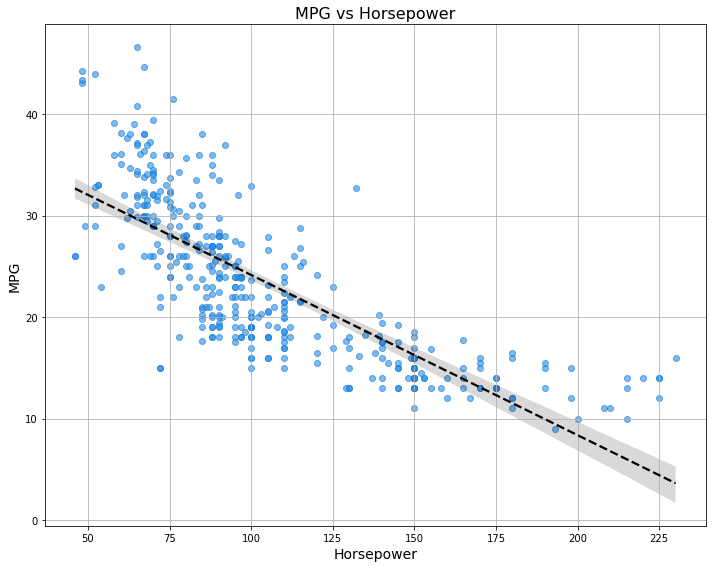

In [12]:
fig, axes = plt.subplots(figsize=(10, 8))
sb.regplot(x='horsepower', y='mpg', data=auto_df, ci=95, scatter_kws = {'alpha': 0.6, 'facecolor': 'dodgerblue'}, \
           line_kws = {'color': 'k', 'linestyle': '--'}, ax=axes)
plt.grid(True)
axes.set_xlabel('Horsepower', fontsize=14)
axes.set_ylabel('MPG', fontsize=14)
axes.set_title('MPG vs Horsepower', fontsize=16)
plt.tight_layout();

### Plot of residuals versus predictor (horsepower)

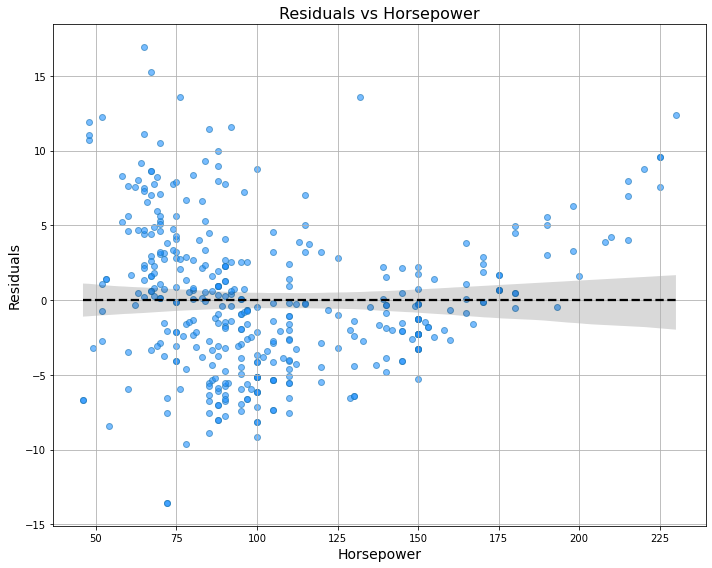

In [13]:
fig, axes = plt.subplots(figsize=(10, 8))
resid = auto_df.mpg-results.fittedvalues
sb.regplot(x='horsepower', y=resid, data=auto_df, ci=95, \
           scatter_kws = {'alpha': 0.6, 'facecolor': 'dodgerblue'}, \
           line_kws = {'color': 'k', 'linestyle': '--'}, ax=axes)
plt.grid(True)
axes.set_xlabel('Horsepower', fontsize=14)
axes.set_ylabel('Residuals', fontsize=14)
axes.set_title('Residuals vs Horsepower', fontsize=16)
plt.tight_layout();

There seems to be a clear pattern in the residual plot, so a linear model doesn't seem to be the right fit.